In [1]:
import pennylane as qml
from pennylane import numpy as np
from utils import QCNN_circuit, Benchmarking, unitary, embedding
import matplotlib.pyplot as plt
from scipy.linalg import eigh, expm
import qutip

# Ising model

## Generating testing dataset

In [12]:
# Generate Hamiltonian
def ising_hamiltonian(L, J, h):
        pauli_x = np.array([[0,1],[1,0]])
        pauli_z = np.array([[1,0],[0,-1]])
        id = np.eye(2)

        sx_list = []
        sz_list = []
        for i_site in range(L):
                z_ops = [id] * L
                x_ops = [id] * L
                z_ops[i_site] = pauli_z
                x_ops[i_site] = pauli_x
                ZZ = z_ops[0]
                X =  x_ops[0]
                for j in range(1, L):
                        ZZ = np.kron(ZZ, z_ops[j])
                        X = np.kron(X, x_ops[j])
                sz_list.append(ZZ)
                sx_list.append(X)
        H_zz = np.zeros((2**L, 2**L))
        H_x = np.zeros((2**L, 2**L))

        for i in range(L-1):
                H_zz += np.matmul(sz_list[i], sz_list[(i + 1)])
                H_x += sx_list[i]

        H_x += sx_list[L-1]

        return np.matrix(-J * H_zz - h * H_x)

# Magnetization operator
def M(L):
        pauli_z = np.array([[1,0],[0,-1]])
        id = np.eye(2)

        sz_list = []
        for i_site in range(L):
                z_ops = [id] * L
                z_ops[i_site] = pauli_z
                Z = z_ops[0]
                for j in range(1, L):
                        Z = np.kron(Z, z_ops[j])
                sz_list.append(Z)
        H_z = np.zeros((2**L, 2**L))

        for i in range(L):
                H_z += sz_list[i]
        return np.matrix(H_z)/L

In [13]:
L = 8

h_list = np.arange(1000)/2000
M_op = M(L)
ground_energies = []
ground_states = []
magnetization = []
for h in h_list:
    energy, state = eigh(ising_hamiltonian(L, 1, h), eigvals_only = False)
    ground_energies.append(min(energy))
    ground_states.append(state[:, np.argmin(energy)])
    ket = np.transpose([ground_states[-1]])
    m = np.matmul(np.matrix(ket).H, np.matmul(M_op, ket))
    magnetization.append(m.item())

## Test and Analysis

In [19]:
# Classification model
params_ising_classification = np.array([-0.015636159932921254, -0.49107420091178555, 0.40464060801392615, -1.1962311388654194, 1.1545423455183879, 1.1275200431360175, -1.3697541926398336, -1.2577371227794552, -0.11335007079056814, 0.5290777614510703, -1.6225818065095468, -1.2909485153677833, -0.7942205359678585, -1.6878942772933714, 2.8731809055060777, -0.9331834634285372, -0.5721044923692015, 1.3041624539556593, -1.7137128342024006, 0.27839299993179356, 0.7298519183446959, 0.05355203906678516, 2.027164039070209, 2.773910774566885, 1.005793115350671, -0.6629348813181124, 0.33475876144467304, 0.08979816609604543, -1.2837971190261483, 2.0283276948713227, 1.4757201620344018, 0.20089344120228644, 0.9967539957463427, -2.0168864602197476, 0.12390486170406259, -0.5347008652962842, 0.36023052685399787, 0.25004333717963084, 0.9050264461477376, 0.9560660236250829, -0.2733219358433417, -0.8582040406923088, -0.3335219353183606, 0.8829122677535407, -0.7808346447531673, -0.7332805746015743, 1.7741397876307838, -2.4817228974999486, -3.5020572934652385, 1.6319496873266222, -1.6044573788169496, 0.6359786443211785, 0.5301608249042523, 0.8687296452046258, 1.3357356503571722, -1.5588270552619563, 0.9941010661369902, -0.03162739485581652, 0.026172480366412395, 1.2516730043653055, 0.19510612668457464, -2.0449555049627697, 0.5218350918772757, -1.5270755025192861, -1.880024943752929, 0.030330887774720903, 2.1323704818076177, 0.13725018700106428, 0.12238063088741798, -0.04146254125508923, -0.8565987771200041, -1.4414483525575104, -0.6217063598036758, -0.6426723947703117, 1.1902098976183675, -0.4099945648098323, -0.7587669336571716, 0.5719303557197681, 0.2079880466030376, -0.3465324883753657, 0.6192712527887215, 1.6632077728244505, 0.40979446299450367, -0.567073052350866, 0.6473594395439745, -2.1845789766227126, 1.217307156682911, -1.061469902547351, -0.6634502104340054, 0.9724179841422579, -0.22174139060759965, -1.108157323636631, 0.2734969874248118, 0.17421201971521086, 0.03939903811040282, -0.4398752435442026, 0.3737966975917324, -2.0731460086598927, -0.656907950552141, -0.024938498130328772, -1.4981545296267005, 1.1193986364536515, -2.0891601571543728, -0.3367436312581131, 1.3819476663219432, 0.8930609043934623, -0.4283046224817808, -0.894330310632443, -0.6574868507994492, -1.7954115518825304, -0.7470216965419461, -0.08608709515376405, -0.991143570420217, -0.32556315699232763, 1.127215071371696, -0.9915946114665916, 1.0898374354547358, -1.1807122536119057, -1.9019031338093455, -0.49647279354005075, 0.5247551208269863, -0.3638343814743441, -0.005566196596105866, 0.3235562040114392, -0.486292344444827, 0.04956506426862241, -1.1643933912668758, -0.6422955087708553, 2.3327824092438827, 1.4151140913845233, 1.0512670937268322, 0.031192211479833185, -0.5707991958994466, -0.2028727311312549, 0.43627023484683286, 0.46222318939936674, 0.8494055018171667, -1.570120219199576, 0.5146485933298297, -0.2982996574514885, 0.6987955741381602, 0.8730337535969993, 0.5857436035545978, -0.34990747643023024, 0.24450673459459832, -0.6239795960690023, -0.06152872618622389, -1.7776736469853143, -0.6931717422639734, 0.025594747663047354, -0.8248905865579983, -1.6397319134674047, 0.4545570826530007, 0.4774431300232311, -0.6431549771943412, 0.6852114737322913, 0.16153805075932784, -0.4867554529020958, -1.3093247958729908, -1.1491251373244937, 0.2907519214356584, 0.4756812929488745, -0.07596741425076815, 1.1018819041345573, 0.8004344298485657, -1.5382950628504495, -1.9498348073966274, -1.6137053117305402, -0.11631928549021378, 0.6141640817054012, 0.5725186976797186, 0.28820062803344215, -0.9718464452041291, -1.307618018783213, 1.7157471610091792, 1.144596709699931, -1.7457340784648716, 0.11998156754931043, -0.013389190232404074, 2.333261452823182, -0.5172897871654469, 1.1577410699171764, 1.0524398922467124, 1.1323734176472449, 0.15485043909684382, 1.301771880300283, -1.4268422729449752, 0.9336407209683938, -0.9863149830403591, -1.0999056793901791, 0.6503884044525711, -0.3036474162561237, 0.29671671688352647, -1.371880789940532, -1.991504791410631, -1.62432617174661, -0.5886298494885912, -0.3586866746472754, -1.4059352829186242, -0.8931367439605182, 1.0317658848617541, 0.0958649527363259, -0.6723248424083347, 1.2037139622677622])
pred_ising_classification = [QCNN_circuit.QCNN(x, params_ising_classification, 'q_SU4', 15, 'Statevector', 'cross_entropy') for x in ground_states]

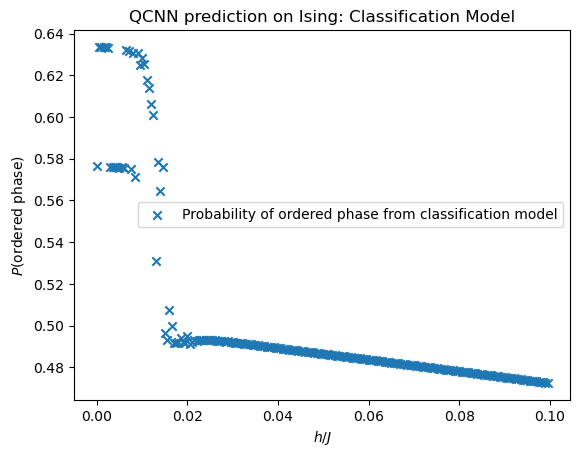

In [24]:
plt.scatter(h_list[:200], [x[1] for x in pred_ising_classification][:200], marker = "x", label = 'Probability of ordered phase from classification model')
plt.xlabel(r"$h/J$")
plt.ylabel(r"$P$(ordered phase)")
plt.legend()
plt.title(r'QCNN prediction on Ising: Classification Model')
plt.savefig('plots/classification_ising_deep.pdf')
plt.show()

# $Z_2\times Z_2$ SPT phase

## Generating Testig dataset

In [2]:
# Generate Hamiltonian
def spt_hamiltonian(L, J, h):
        pauli_x = np.array([[0,1],[1,0]])
        pauli_z = np.array([[1,0],[0,-1]])
        id = np.eye(2)

        sx_list = []
        sz_list = []
        for i_site in range(L):
                z_ops = [id] * L
                x_ops = [id] * L
                z_ops[i_site] = pauli_z
                x_ops[i_site] = pauli_x
                ZZ = z_ops[0]
                X =  x_ops[0]
                for j in range(1, L):
                        ZZ = np.kron(ZZ, z_ops[j])
                        X = np.kron(X, x_ops[j])
                sz_list.append(ZZ)
                sx_list.append(X)
        H_zxz = np.zeros((2**L, 2**L))
        H_xx = np.zeros((2**L, 2**L))

        for i in range(L-2):
                H_zxz += np.matmul(sz_list[i], np.matmul(sx_list[i+1], sz_list[(i + 2)]))
                H_xx += np.matmul(sx_list[i], sx_list[i+1])

        H_xx += np.matmul(sx_list[L-2], sx_list[L-1])

        return np.matrix(-J * H_zxz - h * H_xx)

def stringOp(L):
        pauli_x = np.array([[0,1],[1,0]])
        pauli_z = np.array([[1,0],[0,-1]])
        id = np.eye(2)
        
        ops = [id]*L
        if L%2 == 1:
                ops[0] = pauli_z
                ops[-1] = pauli_z
                for i in range(1, L-1, 2):
                        ops[i] = pauli_x
        elif L%2 == 0:
                ops[0] = pauli_z
                ops[L-2] = pauli_z 
                for i in range(1, L-2, 2):
                        ops[i] = pauli_x
        
        out = ops[0]
        for i in range(1, L):
                out = np.kron(out, ops[i])
                
        

        
        return out
        
        
        


In [3]:
# Generate ground states
L = 8

h_list_spt = (6*np.random.rand(1000) - 3)


ground_energies_spt = []
ground_states_spt = []

orderParams = []

op = stringOp(L)
for h in h_list_spt:
    energy, state = eigh(spt_hamiltonian(L, 1, h), eigvals_only = False)
    ground_energies_spt.append(min(energy))
    ground_states_spt.append(state[:, np.argmin(energy)])
    ket = np.transpose([ground_states_spt[-1]])
    m = np.matmul(np.matrix(ket).H, np.matmul(op, ket))
    orderParams.append(m.item())

In [9]:
# Regression model
params_spt_regression = np.array([-0.1717840233077482, -0.16163841604497295, 1.330661290103207, 0.3968903350401541, -1.0714146916732303, 0.4796267382426519, 1.1207549626209332, 1.5196513634051076, -0.7826751216661058, 1.7674313417531184, -1.4212304882621525, -1.3821720257191965, 1.04852578590204, -0.34341348528033283, -1.2325750379676401, -1.3511582935036903, 0.9136384234744388, -1.6669019180169362, 1.1297253601964303, 1.0394428273036131, 1.43514653471805, 0.10145221551726599, -0.14492874647442683, -1.5690549337698045, 0.019352029547044867, -0.38654140245198404, 0.9598823944764872, 1.0057706150490142, -1.2709979960103588, 0.7186654613493093, 1.398565445600011, -1.2709497114128354, 0.2278136543987931, -1.223992493731234, -0.1192407467934168, 1.9342314732703174, -2.023744002941217, 0.33739535347020777, -0.8617465363228625, -1.5452925303787177, 1.1495810239246589, 0.9849259539674342, 1.4380514046545445, -0.6149272491083497, 0.2879210980251104, -0.3845706786531201, 1.133416177991183, -2.179346678851589, 1.0445579901343633, 0.6291607615376931, -0.5002183763590357, -0.4980204156531147, 0.716660539268624, -0.4061892333685252, -1.053355931490226, -2.3873235517204376, -0.48168972168891766, -1.9243685340485315, -0.46461135748211035, -0.7593455202404618, 0.4111076410712496, -0.3219101413134442, -1.470861258554887, 0.1910450885157669, 2.932407737725403, 0.9510749903935342, 0.47185855375636154, -0.8011545043910128, 0.8247447834992101, -0.619111874984361, -0.6473127743063761, -0.13154381372300544, -0.11107094612818744, -0.6545355211970375, -0.45069796132350687, -0.2621462505976142, -0.29633184642187743, 1.4430000982675266, -0.3158200589412677, -0.3990660837497868, -0.0936278593298568, 0.8975504197048593, -0.46069781643562135, -0.5341770824234644, 0.708887362619086, 0.5310736685993946, -0.9823720585311448, 0.4401059438938172, 0.5575102658128923, -0.08696695239568543, 0.5389492804682856, -0.21047878101656553, 0.39874676133540604, 0.7489650847969043, 1.1096524045701783, 0.9201159114561828, -1.2224551577830205, -0.463637560042055, -0.14760849521974545, 0.2588759211192776, -0.8874284304811091, -0.6023947402744726, 2.886054510786495, -0.4706390669616851, 0.4294243508836072, -0.1671420344605854, 1.0114930400278823, -1.1017452410145399, 0.9870802653336729, -0.04254005027903977, 0.5832863436769311, -1.3224405242847779, -0.18512474513926983, -1.0520358676337507, 0.14436595951268133, -0.563239964533436, 0.7035508966682127, 1.6904335980609773, 0.18934544440808532, 0.14195124050017083, -0.48502419073515135, 0.8619963446278887, -0.7975617614633017, -1.281907515901631, -1.2251472165571649, -0.5162732129296673, 3.184386471814923, -1.2619740363470275, -2.3017429816594492, 1.95852332194102, -0.19482299505964382, 1.2866661821274954, 0.5129286404985476, 0.6818850520219735, -0.7553834492028567, 1.2929196518156254, -0.8425047977430301, 0.4117386544867614, -0.010482807956496228, -0.21121949202220647, 0.9422728288334093, -1.6687041708402826, 1.8019586329921313, -0.14924056869625316, 0.49003016075707023, 0.2960295498169262, -0.6195167915855656, 0.5261484434318261, 0.43511247995855645, 0.13657914051827394, 0.8423359272953682, 1.9090050175260305, 0.6789516410942484, 0.7282030390908326, 0.5195584979719647, 0.27598935870845837, 1.1078824171841481, 1.1359005540733216, 0.08468704165393856, -0.40034187349003336, 1.0991622369296892, -1.199749340991403, 0.1028043196441576, 0.4013145969128281, 0.6878854813517474, -1.0201112056997477, -0.4438813714867277, 0.703910489321307, 0.44619795313863436, -0.42075960065026374, 1.3754039055587066, 1.7520942780499436, -1.945892002288186, -0.6667477610392566, -1.5693207061528955, -0.3473556198853605, 1.8661665195377273, -0.22788689272828416, -1.0445779350080913, 0.12121785828524638, -0.6395324613189506, -0.2522578713301643, 0.2514003885593987, -0.35975704318008883, -0.3396298397057362, -0.751307605863968, -1.059111237042837, 1.4177195589279221, -0.8504478443437327, -0.2551599716337768, 1.005125716142742, 0.5183722929975543, -0.620885054686684, -0.8370819777777428, 1.2431773495338314, -0.870038745179418, -1.1477565307958981, -0.38469955236413833, 0.7449938627754326, 2.7908658031771263, -1.0728908659371472, 0.7849638958153247, 0.8080281133103285, 0.2931705575158614])
pred_spt_regression = [QCNN_circuit.QCNN(x, params_spt_regression, 'q_SU4', 15  , 'Statevector', 'mse') for x in ground_states_spt]

In [5]:
# Classification model (need to manually adjust the circuit when running this part)
params_spt_classification = np.array([-0.18892957807188096, -1.0813346748085944, -2.3465228968555754, -0.4388920653081389, -0.7904312442542835, 1.3502450726291053, 0.007582421594755586, -0.4701088922655261, -0.7712964408103131, 1.2849891564415155, -0.3794950601417875, 0.4068548924086108, 0.565415276418568, 2.4335749062591723, 0.0889811820318849, -0.7894823225541234, 0.3076109403698919, 1.8106838212512155, 0.08363190425863341, 1.901816245444177, -0.12037880207744131, -0.04585862026198411, 0.15443242158108544, 1.2157654590756988, -1.0255484382286628, -2.4513384207050177, -0.07643866840914205, 0.03547759015864578, -0.8588289090210525, -0.04295998880304118, 0.2882582925961289, 0.6691987193685338, 2.229171176624066, -0.7522154142620805, 1.36148839580397, -0.29872036140365127, 0.8067471462954562, -1.625049379400211, -0.5949651137026035, -1.1492877140241444, 0.35052818570058614, 1.9488345287566533, -1.2744937733012958, 1.4991144679841948, 0.12421801064432236, 1.4202142338036012, -1.0806552240672684, 0.30228555441002813, 1.4221996184494032, -0.2555080884136184, 2.1311689144553663, -1.0227550638722056, -0.8270241074097717, -1.8385538411997826, 0.1197809933007769, -0.49436246120809896, 1.3788876092343516, -0.9536999845706549, -0.34637373943382044, 1.3680704883697958, -0.02617732895143146, 1.1198096834743503, -0.4315508770066573, -0.36586431018100474, 0.9017819079969245, 1.5480476623625645, -0.7934713720205082, -1.3140209769575366, -0.8652875067828407, -1.4386380815313669, -0.7030348577298212, -0.21017798859514925, -0.9295623600532772, 0.45223108333295453, -0.13619175263436328, 0.7233670949562886, -1.0803176629843225, -0.7143099997880236, 0.36877668460918184, 0.024430907563988562, -0.5588868679375165, -0.7579971821324848, 0.409787959469488, -0.19172493772180643, -0.9142371012379098, 0.504286760677932, -2.01987184468547, -0.4105274689225331, 0.3692279668586699, 0.9074718788945291, -1.255814935904944, -0.5334080376790469, -1.7318242220145659, -0.3902931868237774, 0.7416139801657897, 1.5055432521172634, 0.9384696303984585, 1.067037313754854, -0.8780184487299368, -1.7714004204625664, -1.769470242109033, 1.6881647924049292, -0.7642696310712178, -1.6845611017889388, -0.3970034085464818, 1.1086792324919206, -0.008618360616880134, 1.161179000827501, 0.2461937424304727, -1.8475705778247353, -1.177140490181023, 0.16406538167276918, 0.385694850681637, 0.9414418956015244, -0.3479877575816979, 0.962330184874143, -0.844476230660254, -0.30726826727743106, 0.06551455858634077, -0.06176091104292735, 0.45644231231308136, -0.9363409387138157, 2.7201248517964265, -0.06454407620393086, 0.0029783126217439596, 1.7079965833435895, -8.098383048705005e-05, -0.6833733527617206, 0.2696056605228585, 0.6558457092841923, -0.15365745692902502, -1.3511498999067117, -0.21470922458903774, 0.8934797774439998, 0.9261220861603635, 0.9805181388332174, -0.6520600327759745, -1.5810808228235718, -0.08862852147092891, 0.5273539385064512, -1.0652280429001402, 0.8441534862473973, 0.6644710297414926, -0.08760716675763895, -0.9772312434564429, -0.9528441134434387, -0.5271238224115856, -0.23854559182516286, 0.4612957147354783, 0.16576638515053382, -0.26511747644472644, 0.7449414630807041, -0.6298382014031264, -1.2422924037580954, -0.6455063427518256, -0.2399192842195832, -0.6224782758349351, 0.15812474119540357, 0.6812796664993239, 0.2805415743392944, 1.67934726367991, 1.6998286723432854, 0.6093595020864142, -2.607222026278393, 1.9415340227580675, 1.6528886129514673, 1.9568071540788627, 0.9321003548945342, 0.6002123223202228, -1.609086939622906, 0.4945282312142622, -0.8594624241365497, -1.0728785538404186, -0.2516079350648426, -0.2894708398549291, 0.6788058693243193, 1.091875466600534, -1.021074322916651, -1.7161267822091273, -2.246719138328604, -0.13514832407385938, -0.9477782076487715, -0.3720688951652089, -0.38220108430295935, 0.5887813470076395, 0.38373533852587355, -0.012135054258794757, 1.7043432343579343, 0.14840207114061663, 0.708504801254017, -0.7419581347248914, -0.18209831440509525, 0.9210131108746766, -0.5874739193025582, 0.9291883910664945, -1.1253170858242447, 0.15776977907843176, 0.1484764842158344, 0.4882022580910959, -1.1623353335488176, -0.8341110336560041, 1.5415376536785939, -0.03144791724667753, -0.6403788002785894])
pred_spt_classification = [QCNN_circuit.QCNN(x, params_spt_classification, 'q_SU4', 15, 'Statevector', 'cross_entropy') for x in ground_states_spt]

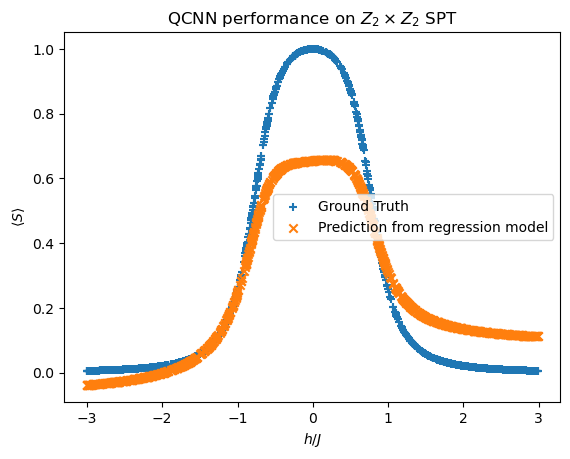

In [ ]:
plt.scatter(h_list_spt, orderParams, marker = '+', label = 'Ground Truth')
plt.scatter(h_list_spt, pred_spt_regression, marker = "x", label = 'Prediction from regression model')
# plt.scatter(h_list_spt, pred_spt_regression_nonlocal, marker = "^", label = 'Prediction from regression model with nonlocal measurement')


plt.xlabel(r"$h/J$")
plt.ylabel(r"$\langle S\rangle$")
plt.legend()
plt.title(r'QCNN performance on $Z_2\times Z_2$ SPT')
plt.savefig('plots/regression_spt_deep.pdf')
plt.show()

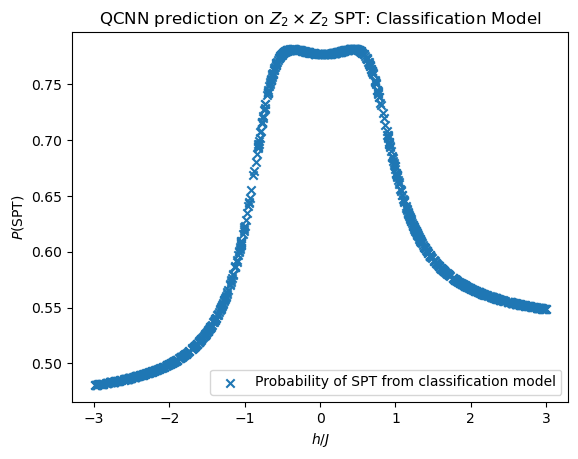

In [8]:
plt.scatter(h_list_spt, [x[1] for x in pred_spt_classification], marker = "x", label = 'Probability of SPT from classification model')
plt.xlabel(r"$h/J$")
plt.ylabel(r"$P$(SPT)")
plt.legend()
plt.title(r'QCNN prediction on $Z_2\times Z_2$ SPT: Classification Model')
plt.savefig('plots/classification_spt_deep.pdf')
plt.show()